In [2]:
# Start coding here... 

# Stock Market Analysis for Tech Stocks
<img src="https://images.unsplash.com/photo-1590283603385-17ffb3a7f29f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8c3RvY2slMjBtYXJrZXR8ZW58MHx8MHx8&auto=format&fit=crop&w=1000&q=60">
<br>
<br>
In this project, I'll analyse data from the stock market for some technology stocks.
I'll use Pandas to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history.

Here are the questions I'll try to answer:

1. What was the change in a stock's price over time?
2. What was the daily return average of a stock?
3. What was the moving average of various stocks?
4. What was the correlation between daily returns of different stocks?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behaviour?



In [3]:
#Python Data Analysis imports
import pandas as pd
import numpy as np

#Visualissation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#To grab stock data
from pandas_datareader import DataReader
from datetime import datetime

In [4]:
#We're going to analyse stock info for Apple, Google, Microsoft, and Amazon
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

In [5]:
#Setting the end date to today
end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year - 1, end.month, end.day)

In [6]:
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)
#The global method allows me to store Apple's stock data in the APPL global variable dataframe

In [7]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-09,127.750000,126.519997,127.209999,127.129997,56877900.0,126.407799
2021-06-10,128.190002,125.940002,127.019997,126.110001,71186400.0,125.393593
2021-06-11,127.440002,126.099998,126.529999,127.349998,53522400.0,126.626556
2021-06-14,130.539993,127.070000,127.820000,130.479996,96906500.0,129.738770
2021-06-15,130.600006,129.389999,129.940002,129.639999,62746300.0,128.903549


In [8]:
#Basic stats for Apple's Stock
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,157.429449,153.839999,155.546654,155.727048,8.882842e+07,155.270371
std,13.528260,12.984684,13.327696,13.213454,2.676410e+07,13.305874
min,127.440002,125.940002,126.529999,126.110001,4.100000e+07,125.393593
25%,147.567505,144.969994,146.085003,146.139999,6.949502e+07,145.530643
50%,154.375000,150.270004,151.735001,151.945000,8.525175e+07,151.540413
75%,169.654995,165.384998,167.457497,166.524998,1.036128e+08,166.280693
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.511703


In [9]:
#Basic info about the dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2021-06-09 to 2022-06-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       254 non-null    float64
 1   Low        254 non-null    float64
 2   Open       254 non-null    float64
 3   Close      254 non-null    float64
 4   Volume     254 non-null    float64
 5   Adj Close  254 non-null    float64
dtypes: float64(6)
memory usage: 13.9 KB


## What's the change in stock price over time?

<AxesSubplot:xlabel='Date'>

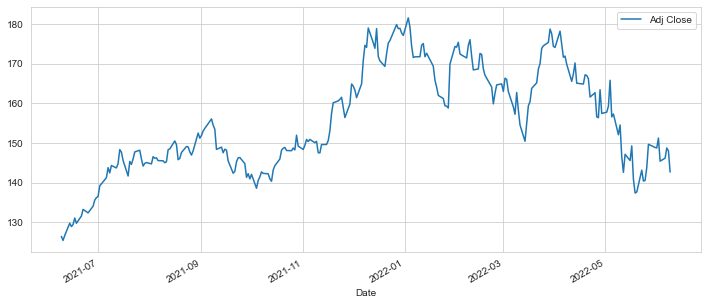

In [10]:
#Plotting the stock's adjusted closing price using pandas
AAPL['Adj Close'].plot(legend = True, figsize = (12,5))

<AxesSubplot:xlabel='Date'>

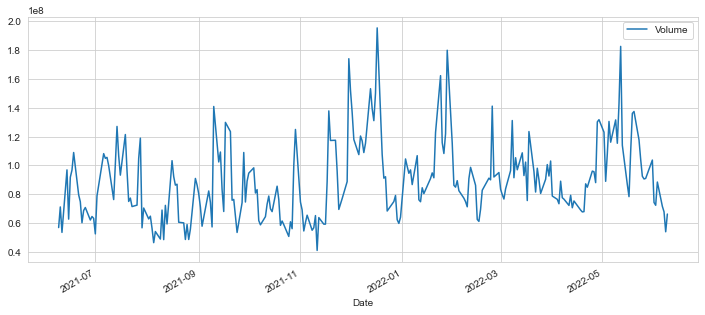

In [11]:
#Plotting the total volume being traded over time
AAPL['Volume'].plot(legend = True, figsize = (12, 5))

## What was rthe moving average of various stocks?

Let's check out the moving average for stocks over a 10, 20 and 50 day period of time. We'll add that information to the stock's dataframe.

In [12]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days' % (str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window = ma, center = False).mean()

In [13]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,
2022-06-03,147.970001,144.460007,146.899994,145.380005,88471400.0,145.380005,144.914001,146.105501,158.942139
2022-06-06,148.570007,144.899994,147.029999,146.139999,71598400.0,146.139999,145.769002,145.548501,158.388647
2022-06-07,149.000000,144.100006,144.350006,148.710007,67808200.0,148.710007,146.329002,145.381001,157.873573
2022-06-08,149.869995,147.460007,148.580002,147.960007,53950200.0,147.960007,147.089003,145.053502,157.325926
2022-06-09,147.940002,142.529999,147.080002,142.639999,66255154.0,142.639999,147.301003,144.860502,156.604777


<AxesSubplot:xlabel='Date'>

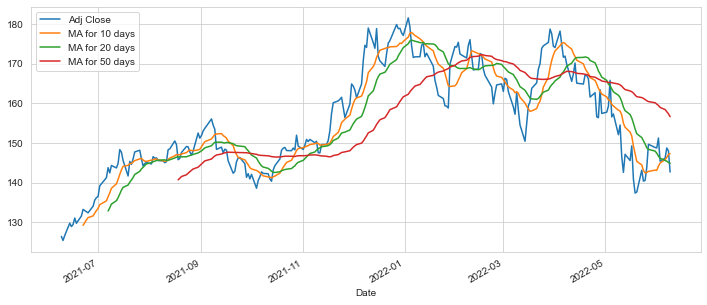

In [14]:
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, figsize = (12,5))

Moving average for more days have a smoother plot, as they're less reliable on daily functinos. So even though, Apple's stock has a slight dip near the start of September, it's generally been on an upward trend since mid-July

## What was the daily return average of a stock?

In [15]:
#The Daily return column can be created by using the percentage change over the adjusted closing price
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [16]:
AAPL['Daily Return'].tail()

Date
2022-06-03   -0.038556
2022-06-06    0.005228
2022-06-07    0.017586
2022-06-08   -0.005043
2022-06-09   -0.035956
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

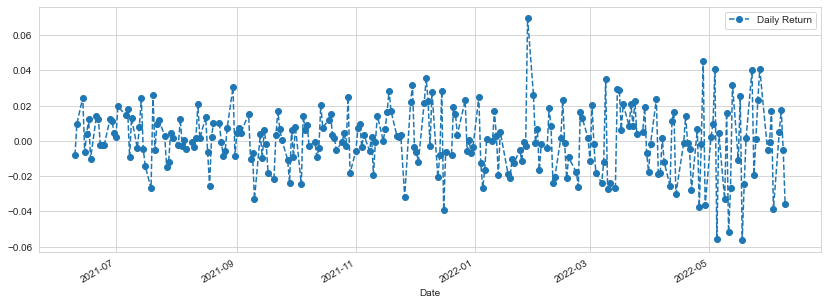

In [17]:
#PLotting the daily return
AAPL['Daily Return'].plot(figsize = (14,5), legend = True, linestyle = '--', marker = 'o')

<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

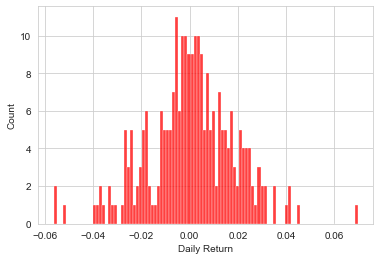

In [18]:
sns.histplot(x=AAPL['Daily Return'].dropna(), bins = 100, color = 'red')

Positive returns seems to be slightly more frequent than negative retunr for Apple.

## What was the correlation between daily returns of different stocks?

In [19]:
#REading jsut 'Adj Close' column this time
close_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

In [20]:
close_df.tail()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-06-03,145.380005,2290.820068,270.019989,122.349998
2022-06-06,146.139999,2336.409912,268.750000,124.790001
2022-06-07,148.710007,2342.989990,272.500000,123.000000
2022-06-08,147.960007,2343.879883,270.410004,121.180000
2022-06-09,142.639999,2296.709961,264.790009,116.150002


Everything worked as expected.
Just as we did earlier, we can use Pandas' pct_change method to get the daily return of our stocks

In [21]:
rets_df = close_df.pct_change()

In [22]:
rets_df.tail()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2022-06-03,-0.038556,-0.026198,-0.016607,-0.025185
2022-06-06,0.005228,0.019901,-0.004703,0.019943
2022-06-07,0.017586,0.002816,0.013953,-0.014344
2022-06-08,-0.005043,0.000380,-0.007670,-0.014797
2022-06-09,-0.035956,-0.020125,-0.020783,-0.041508


Let's try creating a scatterplot to visualise any correlations between different stocks. First we'll use visualise a scatterplot for the relationship between the daily return of a stickto itself.

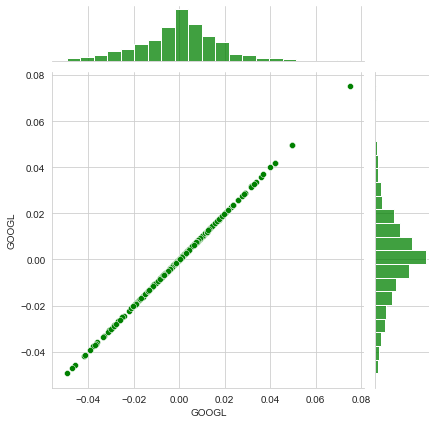

In [23]:
sns.jointplot('GOOGL','GOOGL', rets_df, kind = 'scatter', color = 'green')

As expected, the relationship is perfectyl linear because we're tryinh to correlate something with itslef. Now, lets check out th relationship between Google and Apple's daily returns.

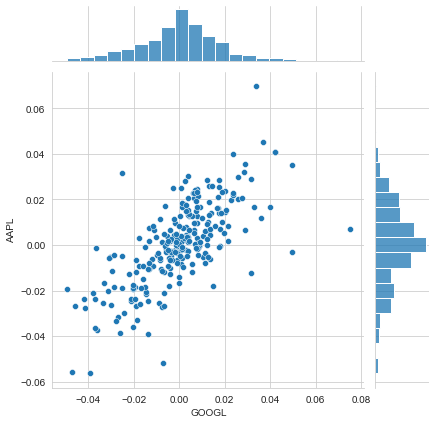

In [24]:
sns.jointplot('GOOGL', 'AAPL', rets_df, kind = 'scatter')

There seems to be a minor correlation between the two stock, looking at the figure above. The Pearson R Correlation Coefficient value of 0.45 echoes that sentiment.

But what about other combineations of stocks?

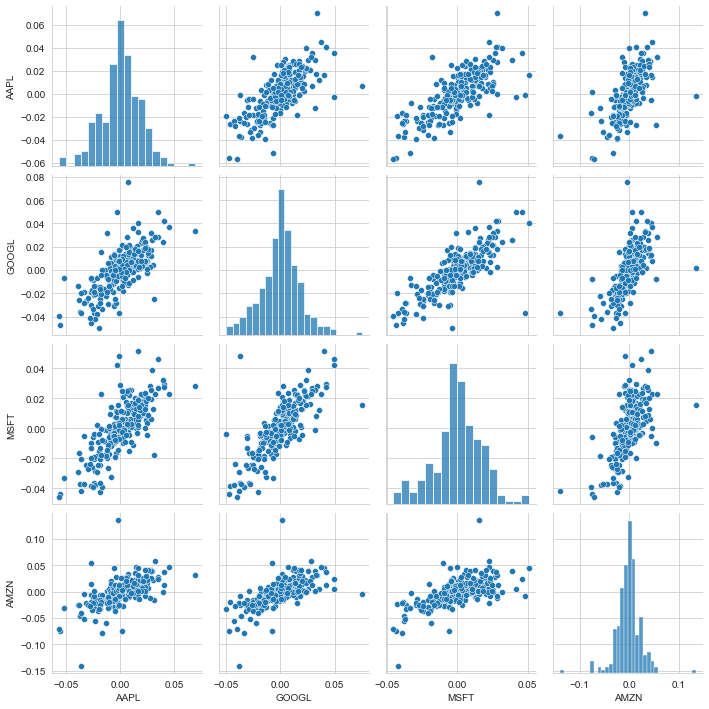

In [25]:
sns.pairplot(rets_df.dropna())

Quick and dirty overeaching visualiation of the scatterplots and histograms of daily returns of our stocks. To see the actual numbers for the correlation coefficient, we can use seaborn's corrplot method.

<AxesSubplot:xlabel='Symbols', ylabel='Date'>

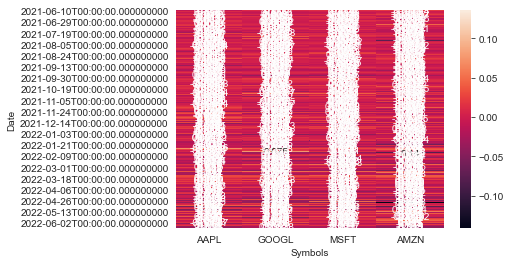

In [26]:
sns.heatmap(rets_df.dropna(), annot = True)

Google and Microsoft seem to have the highest correlation. But another interesting thing to note is that all tech companies that we explored are positively correlated.

## How much value do we put at risk by investing in a particular stock?


A basic way to quantify the risk is to compare the expected return(which can be the mean of the stock's daily returns) with the standard deviation of the daily returns.

In [27]:
rets = rets_df.dropna()

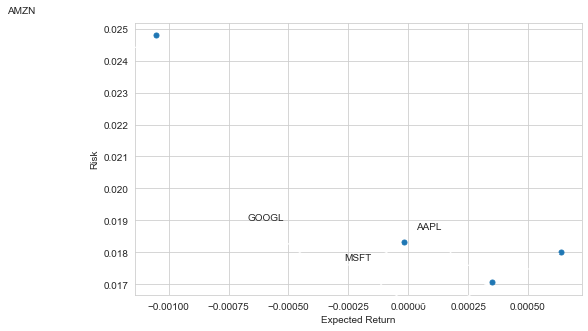

In [31]:
plt.figure(figsize = (8,5))
plt.scatter(rets.mean(), rets.std(), s = 25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

#For adding annotations in the scatterplot
for label,x,y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
    label,
    xy = (x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->', connectionstyle = 'arc3,rad=0.5'))

We'd want a stock to have a high expected return and a low risk; Google and Microsoft seem to be the safe options for that. Meanwhile, Yahoo and Amazon stocks have higher expected returns, but also have a higher risk

## Value at Risk

We can treat Value at risk as the amount of money we could expect to lose for a given confidence interval. We'll use the 'Bootstrap' method and the 'Monte Carlo Method' to extract this value.

**Bootstrap Method**

Using this method, we calculate the empirical quantiles from a histogram of daily returns. The quantiles help us define our confidence interval.


<AxesSubplot:xlabel='Daily Return', ylabel='Count'>

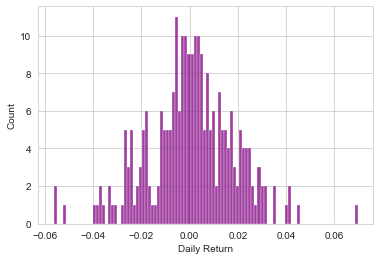

In [32]:
sns.histplot(x = AAPL['Daily Return'].dropna(), bins = 100, color ='purple')

To recap, our histogram for Apple's stock looked like the above. And our daily returns dataframe looked like:

In [33]:
rets.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2021-06-10,-0.008023,0.011292,0.014393,0.020877
2021-06-11,0.009833,-0.002025,0.002527,-0.000842
2021-06-14,0.024578,0.007699,0.007755,0.011067
2021-06-15,-0.006438,-0.008379,-0.005887,-0.000219
2021-06-16,0.003934,-0.005329,-0.003793,0.009494


In [34]:
#Usign Pandas built in quantile method
rets['AAPL'].quantile(0.05)

-0.027440209395122084

The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not exceed 2.57% (of the investment).

## How can we attempt to predict future stock behaviour?

**Monte Carlo Method**

In [35]:
days = 365
#delta t
dt = 1/365

mu = rets.mean()['GOOGL']

sigma = rets.std()['GOOGL']

In [36]:
#Function takes in stock price, number of days to run, mean and standard deviation values
def stock_monte_carlo(start_price, days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte CArlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We're going to run the simulation of Google stocks.

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

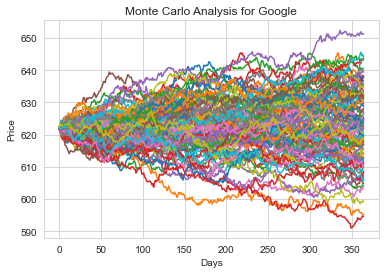

In [39]:
start_price = 622.049

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days , mu , sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [41]:
runs = 1000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days, mu,sigma)[days -1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

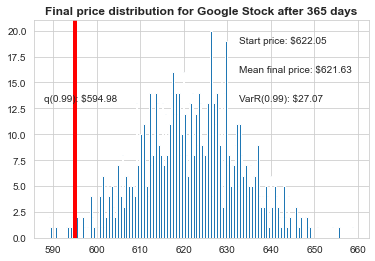

In [46]:
q = np.percentile(simulations,1)
plt.hist(simulations, bins = 200)
plt.figtext(0.6,0.8, s = 'Start price: $%.2f' %start_price)
plt.figtext(0.6,0.7, 'Mean final price: $%.2f' % simulations.mean())
plt.figtext(0.6,0.6, 'VarR(0.99): $%.2f' % (start_price - q,))
plt.figtext(0.15,0.6, 'q(0.99): $%.2f' % q)
plt.axvline(x = q, linewidth = 4, color = 'r')
plt.title(u'Final price distribution for Google Stock after %s days' %days, weight = 'bold')

We can infer from this that, Google's stock is pretty stable. The starting price that we had was USD622.05, and the average final price over 10,000 runs was USD621.63.

The red line indicates the value of stock at risk at the desired confidence interval. For every stock, we'd be risking USD18.38, 99% of the time.
